In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
# septic_data = pd.read_csv("/content/sample_data/SepticDataset1.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# septic_data=septic_data.drop(0, axis=1)
# septic_data=septic_data.drop(1, axis=1)
# septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
# real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# septic_data=septic_data.iloc[0:1500,:]
# news_data= pd.concat([real_data, septic_data], axis=0)
# print(real_data.shape)
# print(septic_data.shape)
# news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# labels=news_data[1]
# labels.head()     
# X = news_data[0]
# Y=news_data[1]
# x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
real_data[0] = real_data[0].replace('\n', '', regex=True).str.strip()  
#labels=news_data[1]
#labels.head()     
#print(type(labels))
#news_data[1].value_counts()
X = real_data[0]
Y=real_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.1, random_state=7)
septic_data = pd.read_csv("/content/sample_data/SepticDataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
septic_data=septic_data.drop(0, axis=1)
septic_data=septic_data.drop(1, axis=1)
septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
#septic_data=septic_data.iloc[0:1500,:]
septic_data[0] = septic_data[0].replace('\n', '', regex=True).str.strip()
x_train=pd.concat([x_train, septic_data[0]], axis=0)
y_train=pd.concat([y_train, septic_data[1]], axis=0)

 
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train = x_train.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
x_test = x_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) + 1  
data = []
punc = '.'
for i in x_train:
  i = i[:-1]
  token = word_tokenize(i)
  if punc in token:
    for index ,val in enumerate(token):
      if punc == val:
        token.pop(index)           
  data.append(token)
x_train = tokenizer.texts_to_sequences(data) 
x_test = tokenizer.texts_to_sequences(x_test)
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')
print(('X_train shape:', x_train.shape))
print(('X_test shape:', x_test.shape))
print(('y_train shape:', y_train.shape))
print(('y_test shape:', y_test.shape))

('X_train shape:', (7156, 100))
('X_test shape:', (240, 100))
('y_train shape:', (7156,))
('y_test shape:', (240,))


In [ ]:
# news_data.dropna(axis=0, inplace=True)
# x = news_data[0]
# y = news_data[1]
# x_train , x_test ,y_train ,  y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
# print(len(x_train))
# data = []
# punc = '.'
# for i in x_train:
#     i = i[:-1]
#     token = word_tokenize(i)
#     if punc in token:
#         for index ,val in enumerate(token):
#             if punc == val:
#                 token.pop(index)
        
#     data.append(token)
    
# print(data)  

In [ ]:
# tokenizer = Tokenizer(num_words=5000) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
# tokenizer.fit_on_texts(x_train)
# x_train = tokenizer.texts_to_sequences(x_train)
# x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
# maxlen = 100
# x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
# x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
# print(x_train)
# news_data.info()

word_index = tokenizer.word_index
vocab_size=len(word_index)

In [ ]:
# from keras import layers

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.fit(x_train, y_train,epochs=10,batch_size=10)
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

#LSTM

In [ ]:
# Import tensor representations for words

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
#print(len(coefs))

embeddings_matrix = np.zeros((vocab_size+1, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2021-10-27 13:58:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-10-27 13:58:46 ERROR 404: Not Found.



In [ ]:
# from tensorflow.keras import Model, Input
# from tensorflow.keras.layers import LSTM, Embedding, Dense
# from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
# print(x_train.shape)
# model = Sequential()
# input_word = Input(shape=(7026,))
# model = Embedding(input_dim=x_train.shape[0], output_dim=1, input_length=100)(input_word)
# model = SpatialDropout1D(0.1)(model)
# model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
# out = TimeDistributed(Dense(1, activation="sigmoid"))(model)
# model = Model(input_word, out)
# model.summary()
def create_model(x_train, y_train, x_test, y_test):
    num_classes = 1 # y_train.shape[1]
    num_tokens = 100 #x_train.shape[1]
    print(num_classes)
    print(num_tokens)
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim = {{choice([16,32,60, 80, 100])}}, input_length = 100))
    model.add(Dropout({{choice([0.3, 0.4, 0.5, 0.6])}}))
    model.add(Conv1D(filters = {{choice([32,50, 60, 80])}}, kernel_size = {{choice([3,6,10,15,20,30])}}, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPool1D())
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['adam', 'sgd'])}},
                  metrics=['acc'])

    # Optional to log output from Keras
    #csv_logger = keras.callbacks.CSVLogger('Logs/dl_model.log')
    
    result = model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=0,
              validation_split=0.1)
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_acc']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [ ]:
# model.compile(optimizer="adam",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# print(x_train.shape , y_train.shape)

# history = model.fit(
#     x=x_train,
#     y=y_train,
#     epochs=10
# )

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=[x_test, y_test])

print("Training Complete")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1125200   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 20)          6800      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

[[  0 185]
 [  0  55]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       185
         1.0       0.23      1.00      0.37        55

    accuracy                           0.23       240
   macro avg       0.11      0.50      0.19       240
weighted avg       0.05      0.23      0.09       240

Accuracy :  0.22916666666666666
Precison :  1.0
Recall :  0.22916666666666666
F1 :  0.37288135593220334


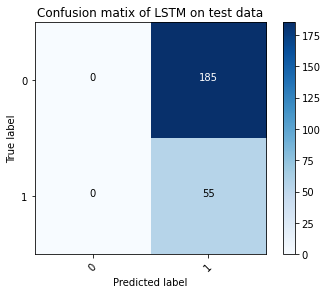

In [ ]:
pred=np.round(model.predict(x_test))
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of LSTM on test data')

In [ ]:
# embedding_dim = 50


#Running ML Models

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
# real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
# septic_data = pd.read_csv("/content/sample_data/SepticDataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# septic_data=septic_data.drop(0, axis=1)
# septic_data=septic_data.drop(1, axis=1)
# septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
# real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
# septic_data=septic_data.iloc[0:1500,:]
# news_data= pd.concat([real_data, septic_data], axis=0)
# news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
# labels=news_data[1]
# labels.head()     
# X = news_data[0]
# Y=news_data[1]
# x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.05, random_state=7)
real_data=pd.read_csv("/content/sample_data/News.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8')
real_data[1] = real_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
real_data[0] = real_data[0].replace('\n', '', regex=True).str.strip()  
#labels=news_data[1]
#labels.head()     
#print(type(labels))
#news_data[1].value_counts()
X = real_data[0]
Y=real_data[1]
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.1, random_state=7)
septic_data = pd.read_csv("/content/sample_data/SepticDataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
septic_data=septic_data.drop(0, axis=1)
septic_data=septic_data.drop(1, axis=1)
septic_data.rename(columns = {2: 0, 3: 1}, inplace = True)
#septic_data=septic_data.iloc[0:1500,:]
septic_data[0] = septic_data[0].replace('\n', '', regex=True).str.strip()
x_train=pd.concat([x_train, septic_data[0]], axis=0)
y_train=pd.concat([y_train, septic_data[1]], axis=0)
x_train = x_train.str.replace('\d+', '') # removing all numbers
x_test = x_test.str.replace('\d+', '')


train=x_train
test=x_test
train = train.map(lambda x: cleantext(x))
test = test.map(lambda x: cleantext(x))
y_train=y_train.astype('int')
y_test=y_test.astype('int')


#SVM

SVM
test:
[[162  23]
 [ 45  10]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       185
           1       0.30      0.18      0.23        55

    accuracy                           0.72       240
   macro avg       0.54      0.53      0.53       240
weighted avg       0.67      0.72      0.69       240

Accuracy :  0.7166666666666667
Precison :  0.7802702702702703
Recall :  0.7166666666666667
F1 :  0.7441326530612246


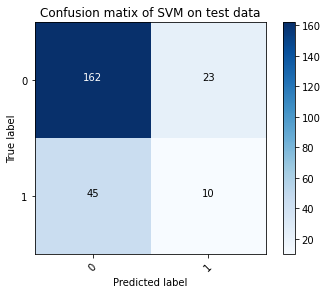

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline.fit(train,y_train)
print('SVM')
print ('test:')
pred=pipeline.predict(test)
print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of SVM on test data')

#Logistic Regression

Logistic Regression
Test:
[[166  19]
 [ 36  19]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       185
           1       0.50      0.35      0.41        55

    accuracy                           0.77       240
   macro avg       0.66      0.62      0.63       240
weighted avg       0.75      0.77      0.75       240

Accuracy :  0.7708333333333334
Precison :  0.8099221949221949
Recall :  0.7708333333333334
F1 :  0.78674529743547


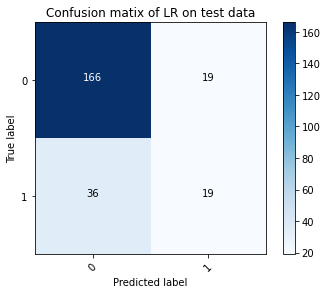

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train,y_train)
print('Logistic Regression')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of LR on test data')

#Gradient Boosting Classifier

Gradient Boost
Test:
[[94 91]
 [21 34]]
              precision    recall  f1-score   support

           0       0.82      0.51      0.63       185
           1       0.27      0.62      0.38        55

    accuracy                           0.53       240
   macro avg       0.54      0.56      0.50       240
weighted avg       0.69      0.53      0.57       240

Accuracy :  0.5333333333333333
Precison :  0.5654381654381654
Recall :  0.5333333333333333
F1 :  0.49703703703703705


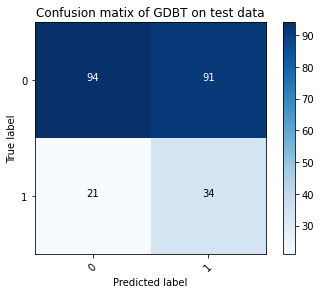

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Gradient Boost')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of GDBT on test data')

#Decision Tree Classifier

Decision Tree
Test:
[[153  32]
 [ 47   8]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.79       185
           1       0.20      0.15      0.17        55

    accuracy                           0.67       240
   macro avg       0.48      0.49      0.48       240
weighted avg       0.64      0.67      0.65       240

Accuracy :  0.6708333333333333
Precison :  0.7134316134316134
Recall :  0.6708333333333333
F1 :  0.6904078377762589


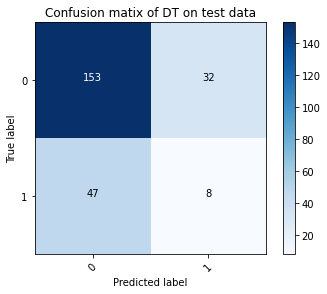

In [ ]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Decision Tree')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of DT on test data')

#Random Forest Classifier

Random Forest Classifier
Test:
[[165  20]
 [ 47   8]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       185
           1       0.29      0.15      0.19        55

    accuracy                           0.72       240
   macro avg       0.53      0.52      0.51       240
weighted avg       0.67      0.72      0.68       240

Accuracy :  0.7208333333333333
Precison :  0.8048075348075348
Recall :  0.7208333333333333
F1 :  0.7567468867914985


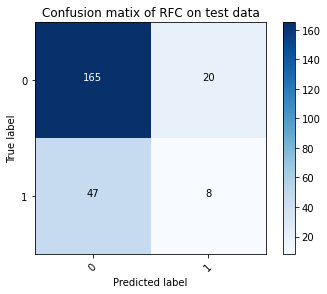

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', RandomForestClassifier())
    ])
fit = pipeline.fit(train,y_train)
print('Random Forest Classifier')
print ('Test:')
pred=pipeline.predict(test)

print_metrices(pred,y_test)
plot_confusion_matrix(confusion_matrix(y_test,pred),target_names=[0,1], normalize = False, \
                      title = 'Confusion matix of RFC on test data')